In [22]:
#Import modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
#Set the parent folder AI II FINAL CODE as main path 
try: 
    import os
    if str(os.getcwd())[-16:] != "AI II FINAL CODE": 
        os.chdir('../../AI II FINAL CODE/')
except:
    pass 

In [24]:
#import os 


In [25]:
#Import local modules 
%run CurrentCode/Model2.ipynb
%run CurrentCode/optActFunctions2.ipynb
%run CurrentCode/DeviceDataLoader2.ipynb

Using device: cuda


In [ ]:
#Get the activation functions 
actFuncList = [gelu, softplus, erfPlus, erfRelu, squarePlus, nn.ReLU, nn.Softplus, nn.GELU, degreePlus] 

#choose the activation function 
actFunc = actFuncList[2]

In [ ]:
#After setting the seed, make the model with the respective params and put it into your GPU/CPU device 
set_seed(23)
model = ResNet(block=ResidualBlock, img_input_dim=28, layers=200, actFunc=actFunc)
model = to_device(model, device)

In [ ]:
#Check the intialized weights of the model 
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
    break

#This functions was used to confirm that the weights are intialized to be the exact same 
if 1==0: 
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.data)
        break

encoder.weight tensor([[-0.0051, -0.0151, -0.0055,  ...,  0.0020, -0.0088, -0.0191],
        [ 0.0175, -0.0093, -0.0212,  ..., -0.0182, -0.0261,  0.0094],
        [-0.0064, -0.0023,  0.0099,  ...,  0.0048,  0.0281,  0.0120],
        ...,
        [ 0.0087,  0.0088, -0.0178,  ...,  0.0285, -0.0317,  0.0117],
        [-0.0355, -0.0164, -0.0064,  ...,  0.0356,  0.0165, -0.0218],
        [ 0.0105,  0.0169,  0.0148,  ..., -0.0269, -0.0058,  0.0257]],
       device='cuda:0')


In [ ]:
#Print the model and intialize the Learning rates 
history = []
LR = [0.2, 0.1, 0.05, 0.025, 0.01]
#test fit the model to see if it works well 
print(model)

ResNet(
  (encoder): Linear(in_features=784, out_features=64, bias=True)
  (input_actFunc): erfPlus()
  (hid_layers): Sequential(
    (0): ResidualBlock(
      (FC1): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): erfPlus()
      )
      (FC2): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, bias=True)
      )
      (actFunc1): erfPlus()
    )
    (1): ResidualBlock(
      (FC1): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): erfPlus()
      )
      (FC2): Sequential(
        (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=64, out_features=64, b

In [ ]:
#Train the model 
startLr = 0.2 
for i in range(len(LR)):
    history += model.fit(epochs=5, lr=LR[i], mo=0.1, train_loader=train_loader, val_loader=val_loader)
    startLr /= 2 

Epoch [0] val_loss: 1.7678, val_acc: 0.6913, time: 19.0904 s
Epoch [1] val_loss: 1.6991, val_acc: 0.7615, time: 19.1765 s
Epoch [2] val_loss: 1.6661, val_acc: 0.7943, time: 20.0019 s
Epoch [3] val_loss: 1.6862, val_acc: 0.7746, time: 21.1312 s
Epoch [4] val_loss: 1.7484, val_acc: 0.7118, time: 19.7012 s
-----------------------------------------------------
Epoch [0] val_loss: 1.6340, val_acc: 0.8273, time: 19.6795 s
Epoch [1] val_loss: 1.6164, val_acc: 0.8441, time: 20.8123 s
Epoch [2] val_loss: 1.6153, val_acc: 0.8457, time: 21.6003 s
Epoch [3] val_loss: 1.6746, val_acc: 0.7861, time: 19.5126 s
Epoch [4] val_loss: 1.6433, val_acc: 0.8170, time: 20.5112 s
-----------------------------------------------------
Epoch [0] val_loss: 1.6047, val_acc: 0.8563, time: 19.2300 s
Epoch [1] val_loss: 1.6084, val_acc: 0.8521, time: 19.2805 s
Epoch [2] val_loss: 1.6104, val_acc: 0.8504, time: 19.3314 s
Epoch [3] val_loss: 1.6065, val_acc: 0.8539, time: 19.2659 s
Epoch [4] val_loss: 1.6071, val_acc: 0

2.016763132896207


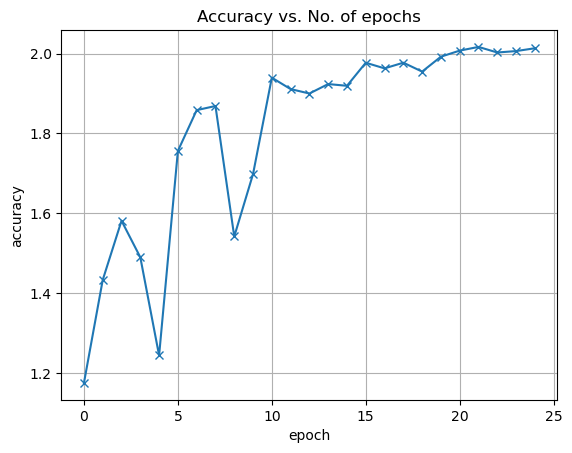

In [ ]:
#Plot the accuracies of the model 
accuracies = [x['val_acc'] for x in history]
plt.plot(-np.log(1-np.array(accuracies)), '-x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy (y) over epochs (x)')
plt.grid()
print(max(-np.log(1-np.array(accuracies))))

Text(0.5, 1.0, 'Time per epoch')

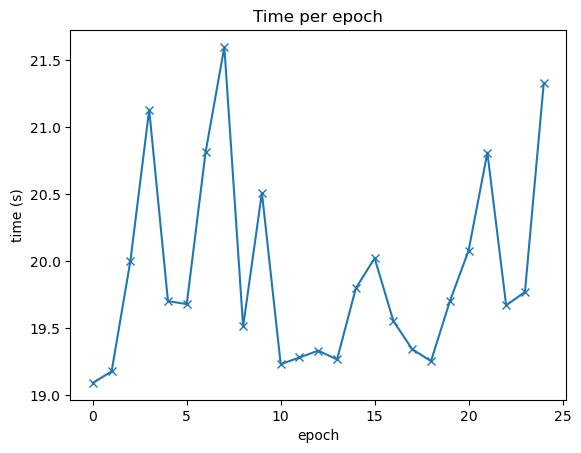

In [34]:
time = [x['epoch_time'] for x in history]
plt.plot(time, '-x')
plt.xlabel('epoch')
plt.ylabel('time (s)')
plt.title('Time per epoch')


In [35]:
np.mean(time), np.std(time)

(np.float64(19.906004352569582), np.float64(0.7067903559780732))